In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

[list comprehension](https://www.w3schools.com/python/python_lists_comprehension.asp)

In [2]:
# read the data
input_dir = '/Users/junheyang/Desktop/working_docs/Accelerator/data/Output/Reddit'

all_files = pd.concat([
    pd.read_csv(os.path.join(input_dir, file))
    for file in os.listdir(input_dir)
    if file.endswith('.csv')
])

# equivalent
# csv_files = []
# for file in os.listdir(input_dir):
#     if file.endswith('.csv'):
#         file_path = os.path.join(input_dir, file)
#         df = pd.read_csv(file_path)
#         csv_files.append(df)
# all_files = pd.concat(csv_files)

# save the data
#all_files.to_csv('/Users/junheyang/Desktop/working_docs/Accelerator/data/Output/Reddit/all_files.csv', index=False)


In [3]:
all_files.head()

,id_submission,name,created_utc_submission,title,selftext,subreddit_submission,id_comment,subreddit_comment,created_utc_comment,body,link_id,parent_id
0,3574mw,t3_3574mw,2015-05-07 17:38:28,Essure this afternoon (x-post to childfree),I'll be heading to the hospital in 3 hours to ...,truechildfree,cr1n0gz,truechildfree,2015-05-07 18:13:18,You can do it! Just please make sure to take y...,t3_3574mw,t3_3574mw
1,3574mw,t3_3574mw,2015-05-07 17:38:28,Essure this afternoon (x-post to childfree),I'll be heading to the hospital in 3 hours to ...,truechildfree,cr21ui2,truechildfree,2015-05-08 00:57:56,"Awesome, I'm a bit jealous!",t3_3574mw,t3_3574mw
2,3574mw,t3_3574mw,2015-05-07 17:38:28,Essure this afternoon (x-post to childfree),I'll be heading to the hospital in 3 hours to ...,truechildfree,cr21vda,truechildfree,2015-05-08 00:58:40,"Curious, OP said they would be under for the p...",t3_3574mw,t1_cr1n0gz
3,3574mw,t3_3574mw,2015-05-07 17:38:28,Essure this afternoon (x-post to childfree),I'll be heading to the hospital in 3 hours to ...,truechildfree,cr2bxcr,truechildfree,2015-05-08 07:26:37,Oh I didn't see that. It's not typically recom...,t3_3574mw,t1_cr21vda
4,3574mw,t3_3574mw,2015-05-07 17:38:28,Essure this afternoon (x-post to childfree),I'll be heading to the hospital in 3 hours to ...,truechildfree,cr31czo,truechildfree,2015-05-08 22:45:50,Yeeeeaaaah that's terrifying. Sounds like goin...,t3_3574mw,t1_cr2bxcr


In [4]:
# how many unique submission are there?
all_files.groupby(['subreddit_submission'])['id_submission'].nunique()


subreddit_submission
hysterectomy     33
truechildfree    54
Name: id_submission, dtype: int64

Is unique user ever a question? Does Reddit allow multiple entries for the same user?

In [5]:
# Convert the timestamp column to datetime
all_files['created_utc_comment'] = pd.to_datetime(all_files['created_utc_comment'])
all_files['created_utc_submission'] = pd.to_datetime(all_files['created_utc_submission'])

In [6]:
print("Earliest comment:", all_files['created_utc_comment'].min())

print("Latest comment:", all_files['created_utc_comment'].max())

Earliest comment: 2014-03-14 17:43:36
Latest comment: 2022-11-22 17:47:34


In [7]:
# Group by subreddit and show date ranges
for subreddit in all_files['subreddit_submission'].unique():
    subreddit_data = all_files[all_files['subreddit_submission'] == subreddit]
    print(f"\nSubreddit: {subreddit}")
    print("Earliest submission:", subreddit_data['created_utc_submission'].min())
    print("Latest submission:", subreddit_data['created_utc_submission'].max())


Subreddit: truechildfree
Earliest submission: 2014-03-14 14:54:48
Latest submission: 2022-09-25 19:26:32

Subreddit: nan
Earliest submission: NaT
Latest submission: NaT

Subreddit: hysterectomy
Earliest submission: 2019-01-17 14:21:32
Latest submission: 2022-11-22 14:21:01


plot this?

How to handle NAs?

In [8]:
# average length of comment body
# Calculate average length of comment body
all_files['body_length'] = all_files['body'].str.len()
average_length = all_files['body_length'].mean()
print(f"Average comment length: {average_length:.2f} characters")

# If you want to see the distribution
print("\nComment length statistics:")
print(all_files['body_length'].describe())

Average comment length: 469.47 characters

Comment length statistics:
count     415.000000
mean      469.472289
std       574.001754
min         2.000000
25%       143.500000
50%       307.000000
75%       577.500000
max      5074.000000
Name: body_length, dtype: float64


<Figure size 1000x600 with 0 Axes>

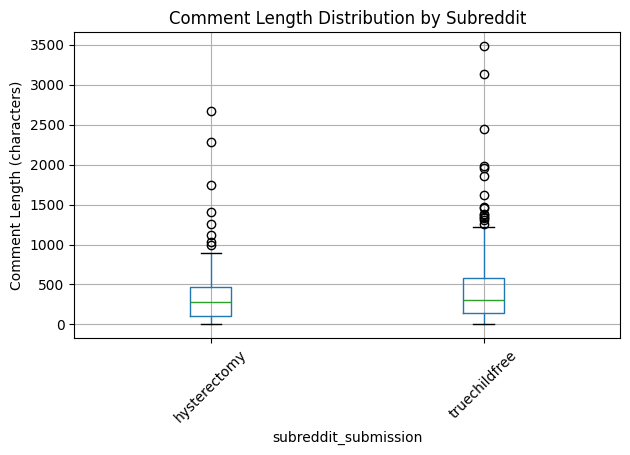

In [9]:
# Calculate comment length statistics by subreddit
subreddit_stats = all_files.groupby('subreddit_submission').agg({
    'body_length': ['count', 'mean', 'std', 'min', 'max']
}).round(2)

# a visual comparison
plt.figure(figsize=(10, 6))
all_files.boxplot(column='body_length', by='subreddit_submission', rot=45)
plt.title('Comment Length Distribution by Subreddit')
plt.ylabel('Comment Length (characters)')
plt.suptitle('')  # removes the automatic suptitle
plt.tight_layout()
plt.show()

total number of subreddits?

unique number of users?

only start with original post (submissions)? what is the most efficient way to get this subset?

text data preprocessing

In [ ]:
# define a function to clean the text data

text data representation: consider word frequency, TFIDF, embeddings